In [426]:
import pandas as pd

In [427]:
from card_utils import read_all_game_data

In [428]:
game_cards_list, player_cards_list, player_stats, player_tags_list = read_all_game_data()

In [429]:
player_cards_dict = {}
for player_cards in player_cards_list:
    tag = player_cards.tag[1:]
    player_cards_dict[tag] = list(map(lambda x: x.name, player_cards.available_cards))

In [430]:
df_main_raw = pd.read_json('results/a_raw_results_run_150_players.jsonl', lines=True)
df_main_valid = pd.read_json('results/a_valid_results_run_150_players.jsonl', lines=True)

In [431]:
df_main_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              1500 non-null   object
 1   llm                  1500 non-null   object
 2   with_context         1500 non-null   bool  
 3   raw_response         1264 non-null   object
 4   parsed_successfully  1500 non-null   bool  
 5   parse_error          559 non-null    object
dtypes: bool(2), object(4)
memory usage: 49.9+ KB


In [432]:
df_main_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   seleccion                   941 non-null    object
 1   detalle                     941 non-null    object
 2   resumen                     941 non-null    object
 3   n                           941 non-null    int64 
 4   user_id                     941 non-null    object
 5   deleted                     941 non-null    object
 6   original                    941 non-null    object
 7   llm                         941 non-null    object
 8   with_context                941 non-null    bool  
 9   original_deck_rating        941 non-null    object
 10  selected_deck_rating        941 non-null    object
 11  total_original_deck_rating  941 non-null    int64 
 12  total_selected_deck_rating  941 non-null    int64 
 13  was_improved                941 non-null    bool  

In [433]:
df_main_valid = df_main_valid[df_main_valid['seleccion'].apply(len) <= 4]

In [434]:
df_decks = df_main_valid.copy()
df_decks['original_full_deck'] = df_decks.apply(lambda row: row['deleted'] + row['original'], axis=1)
df_decks['predicted_full_deck'] = df_decks.apply(lambda row: row['original'] + row['seleccion'], axis=1)

In [435]:
original_unique_decks = df_decks['original_full_deck'].apply(lambda x: frozenset(x)).unique().tolist()
predicted_unique_decks = df_decks['predicted_full_deck'].apply(lambda x: frozenset(x)).unique().tolist()

total_unique_decks = set(original_unique_decks).union(set(predicted_unique_decks))
print(f"Total unique decks in original and predicted: {len(total_unique_decks)}")

Total unique decks in original and predicted: 997


In [436]:
df_main_valid['available_cards'] = df_main_valid['user_id'].map(player_cards_dict)

In [437]:
df_main_valid.head()

,seleccion,detalle,resumen,n,user_id,deleted,original,llm,with_context,original_deck_rating,selected_deck_rating,total_original_deck_rating,total_selected_deck_rating,was_improved,available_cards
0,"[Goblin Gang, Inferno Dragon, Fireball, Zap]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,VL0QCY9R8,"[Zap, Mega Knight, Bandit, Spear Goblins]","[Firecracker, Bats, Skeletons, Skeleton Barrel]",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 4, 'Ver...","{'Attack': 2, 'Defense': 5, 'Synergy': 3, 'Ver...",20,20,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
1,"[Goblin Giant, Firecracker, Goblin Gang, Zap]","[{'carta': 'Goblin Giant', 'costo_elixir': '6'...",Mazo de Beatdown con Goblin Giant como tanque ...,4,RLVLPLLRU,"[Arrows, Lumberjack, Graveyard, Dart Goblin]","[Tesla, Mega Knight, Minions, Guards]",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 3, 'Ver...",17,19,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
2,"[Fisherman, Fireball, Archers, Goblin Gang]","[{'carta': 'Fisherman', 'costo_elixir': '3', '...",El mazo se enfoca en un estilo de juego de con...,4,UP80QCJJV,"[Tesla, Musketeer, P.E.K.K.A, The Log]","[Royal Delivery, Bowler, Mini P.E.K.K.A, Hog R...",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...",17,17,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
3,"[Goblin Gang, Inferno Dragon, Fireball, Zap]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,U9QUY9Y2Y,"[Archer Queen, Valkyrie, Fire Spirit, The Log]","[Poison, Mortar, Goblins, Miner]",gpt-35-turbo,False,"{'Attack': 5, 'Defense': 5, 'Synergy': 5, 'Ver...","{'Attack': 4, 'Defense': 5, 'Synergy': 5, 'Ver...",21,22,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
4,"[Goblin Gang, Fireball, Ice Spirit, Mega Minion]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,CVRURLY0U,"[Wizard, Mega Knight, Royal Giant, Goblin Cage]","[Electro Wizard, Goblin Giant, Lumberjack, Eli...",gpt-35-turbo,False,"{'Attack': 5, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 4, 'Ver...",17,19,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."


In [438]:
# Contamos porcentaje de null sobre el total de entradas por llm en solumna parse_error de df_main_raw
df_main_raw['parse_error'].isnull().mean()

np.float64(0.6273333333333333)

In [439]:
# Porcentaje de respuestas sin error de parseo por llm
df_main_raw.groupby('llm')['parse_error'].apply(lambda x: x.isnull().mean())

llm
DeepSeek-V3.1             0.870000
Llama-3.3-70B-Instruct    0.103333
gpt-35-turbo              0.223333
gpt-4o                    0.946667
gpt-5-chat                0.993333
Name: parse_error, dtype: float64

In [440]:
# cantidad vs total de respuestas sin error de parseo por llm
df_main_raw.groupby('llm')['parse_error'].apply(lambda x: x.isnull().mean()) * df_main_raw.groupby('llm').size()

llm
DeepSeek-V3.1             261.0
Llama-3.3-70B-Instruct     31.0
gpt-35-turbo               67.0
gpt-4o                    284.0
gpt-5-chat                298.0
dtype: float64

In [ ]:
all_llms = set(df_main_valid["llm"].unique())

llm_por_usuario = df_main_valid.groupby("user_id")["llm"].apply(set)
usuarios_completos = llm_por_usuario[llm_por_usuario.apply(lambda s: s == all_llms)].index

df_completo = df_main_valid[df_main_valid["user_id"].isin(usuarios_completos)].copy()

In [ ]:
df_completo.groupby('llm')['was_improved'].apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.333333
Llama-3.3-70B-Instruct    0.500000
gpt-35-turbo              0.833333
gpt-4o                    0.250000
gpt-5-chat                0.416667
Name: was_improved, dtype: float64

In [443]:
df_completo[df_completo['with_context'] == True] \
    .groupby('llm')['was_improved'] \
    .apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.333333
Llama-3.3-70B-Instruct    0.600000
gpt-35-turbo              0.000000
gpt-4o                    0.166667
gpt-5-chat                0.166667
Name: was_improved, dtype: float64

In [444]:
df_completo[df_completo['with_context'] == False] \
    .groupby('llm')['was_improved'] \
    .apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.333333
Llama-3.3-70B-Instruct    0.333333
gpt-35-turbo              1.000000
gpt-4o                    0.333333
gpt-5-chat                0.666667
Name: was_improved, dtype: float64

In [ ]:
df_main_valid.groupby('llm')['was_improved'].apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.524904
Llama-3.3-70B-Instruct    0.483871
gpt-35-turbo              0.559322
gpt-4o                    0.443662
gpt-5-chat                0.593960
Name: was_improved, dtype: float64

In [446]:
df_main_valid[df_main_valid['with_context'] == True] \
    .groupby('llm')['was_improved'] \
    .apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.587786
Llama-3.3-70B-Instruct    0.619048
gpt-35-turbo              0.500000
gpt-4o                    0.478873
gpt-5-chat                0.586667
Name: was_improved, dtype: float64

In [447]:
df_main_valid[df_main_valid['with_context'] == False] \
    .groupby('llm')['was_improved'] \
    .apply(lambda x: x.astype(bool).mean())

llm
DeepSeek-V3.1             0.461538
Llama-3.3-70B-Instruct    0.200000
gpt-35-turbo              0.581395
gpt-4o                    0.408451
gpt-5-chat                0.601351
Name: was_improved, dtype: float64

In [448]:
df_main_valid.head()

,seleccion,detalle,resumen,n,user_id,deleted,original,llm,with_context,original_deck_rating,selected_deck_rating,total_original_deck_rating,total_selected_deck_rating,was_improved,available_cards
0,"[Goblin Gang, Inferno Dragon, Fireball, Zap]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,VL0QCY9R8,"[Zap, Mega Knight, Bandit, Spear Goblins]","[Firecracker, Bats, Skeletons, Skeleton Barrel]",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 4, 'Ver...","{'Attack': 2, 'Defense': 5, 'Synergy': 3, 'Ver...",20,20,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
1,"[Goblin Giant, Firecracker, Goblin Gang, Zap]","[{'carta': 'Goblin Giant', 'costo_elixir': '6'...",Mazo de Beatdown con Goblin Giant como tanque ...,4,RLVLPLLRU,"[Arrows, Lumberjack, Graveyard, Dart Goblin]","[Tesla, Mega Knight, Minions, Guards]",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 3, 'Ver...",17,19,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
2,"[Fisherman, Fireball, Archers, Goblin Gang]","[{'carta': 'Fisherman', 'costo_elixir': '3', '...",El mazo se enfoca en un estilo de juego de con...,4,UP80QCJJV,"[Tesla, Musketeer, P.E.K.K.A, The Log]","[Royal Delivery, Bowler, Mini P.E.K.K.A, Hog R...",gpt-35-turbo,False,"{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 2, 'Ver...",17,17,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
3,"[Goblin Gang, Inferno Dragon, Fireball, Zap]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,U9QUY9Y2Y,"[Archer Queen, Valkyrie, Fire Spirit, The Log]","[Poison, Mortar, Goblins, Miner]",gpt-35-turbo,False,"{'Attack': 5, 'Defense': 5, 'Synergy': 5, 'Ver...","{'Attack': 4, 'Defense': 5, 'Synergy': 5, 'Ver...",21,22,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."
4,"[Goblin Gang, Fireball, Ice Spirit, Mega Minion]","[{'carta': 'Goblin Gang', 'costo_elixir': '3',...",Este mazo se enfoca en un estilo de juego de c...,4,CVRURLY0U,"[Wizard, Mega Knight, Royal Giant, Goblin Cage]","[Electro Wizard, Goblin Giant, Lumberjack, Eli...",gpt-35-turbo,False,"{'Attack': 5, 'Defense': 5, 'Synergy': 2, 'Ver...","{'Attack': 3, 'Defense': 5, 'Synergy': 4, 'Ver...",17,19,True,"[Knight, Archers, Goblins, Giant, P.E.K.K.A, M..."


In [449]:
df_main_valid_copy = df_main_valid.copy()

### Hecho de la mano con Claude Code, para el eficiente cálculo y almacenamiento de las métricas, y mayor robustez del análisis.

Calculando métricas básicas...
Extrayendo ratings...

MÉTRICAS BÁSICAS POR MODELO
                       precision          recall         f1_score          \
                            mean     std    mean     std     mean     std   
llm                                                                         
DeepSeek-V3.1             0.1561  0.2177  0.1561  0.2177   0.1561  0.2177   
Llama-3.3-70B-Instruct    0.1210  0.1692  0.1210  0.1692   0.1210  0.1692   
gpt-35-turbo              0.0593  0.1258  0.0593  0.1258   0.0593  0.1258   
gpt-4o                    0.1664  0.2365  0.1664  0.2365   0.1664  0.2365   
gpt-5-chat                0.1812  0.2442  0.1812  0.2442   0.1812  0.2442   

                       true_positives  
                                 mean  
llm                                    
DeepSeek-V3.1                  0.6245  
Llama-3.3-70B-Instruct         0.4839  
gpt-35-turbo                   0.2373  
gpt-4o                         0.6655  
gpt-5-chat           

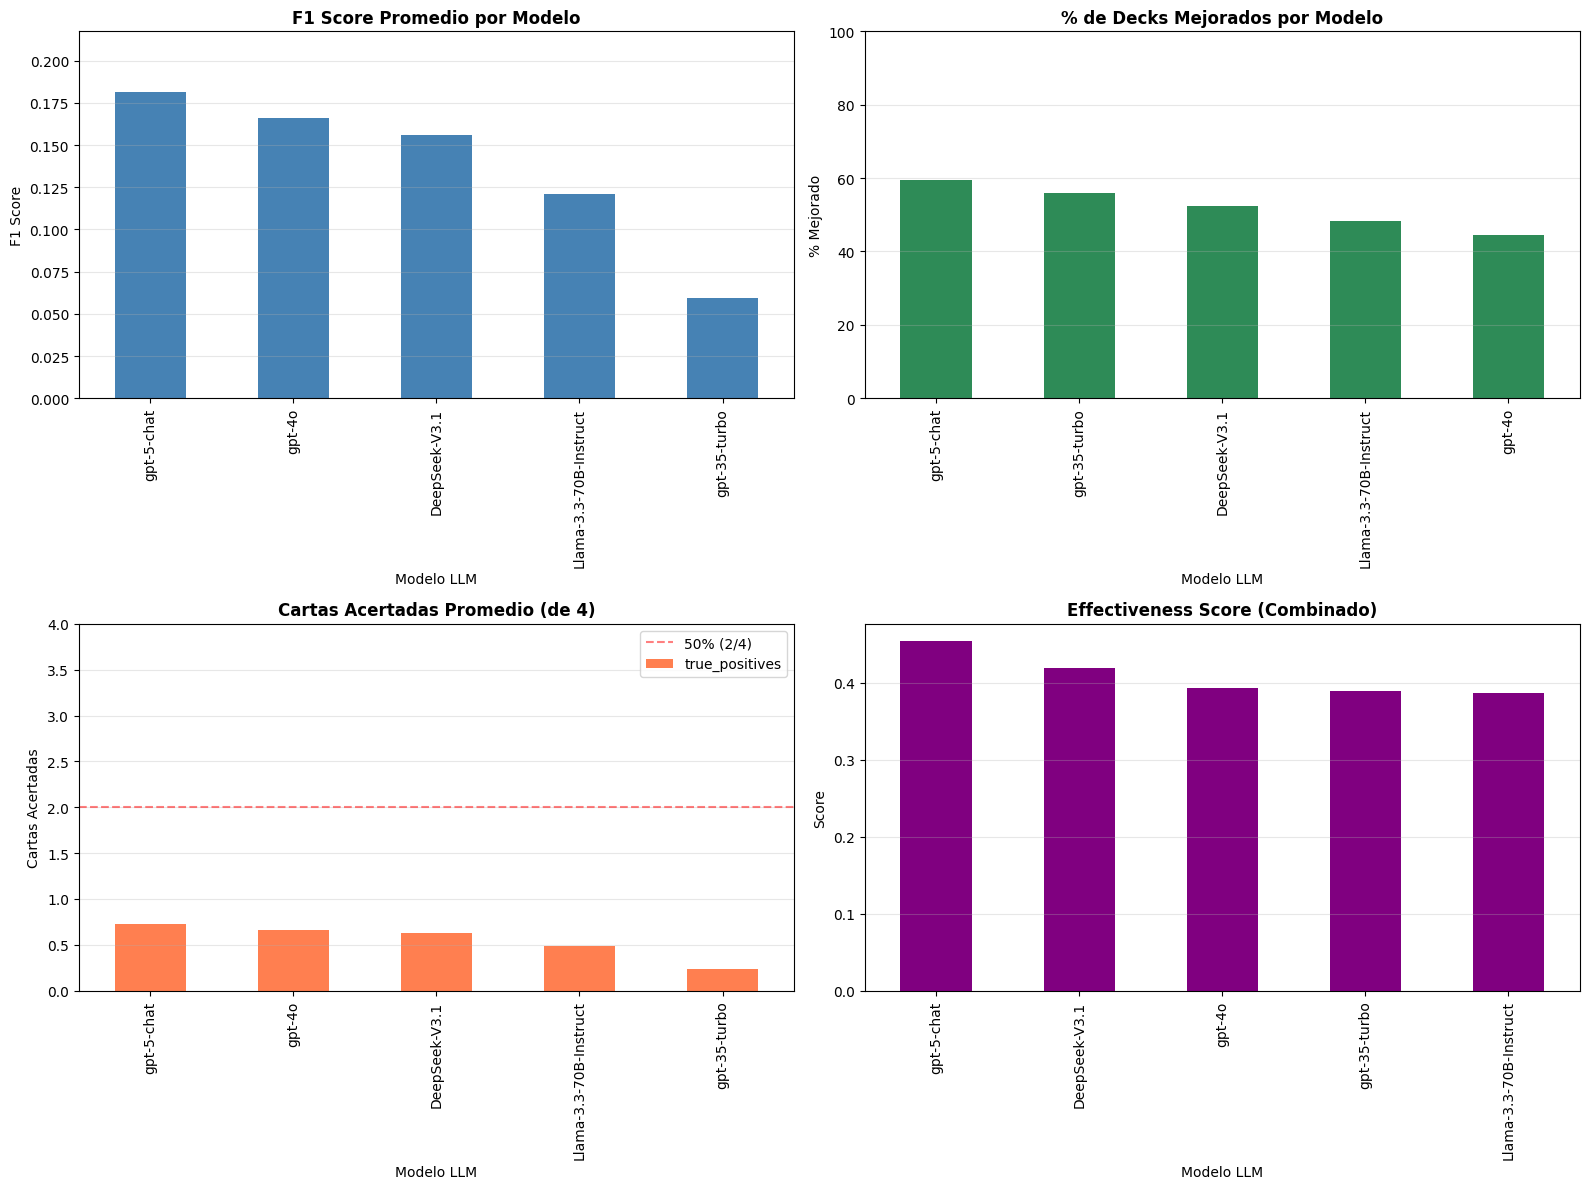

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# PASO 1: CALCULAR MÉTRICAS BÁSICAS (Precision, Recall, F1)
# ============================================================================

def calculate_metrics_per_row(row):
    """
    Calcula métricas relevantes para sistemas de recomendación.
    """
    y_true_set = set(row['deleted'])
    y_pred_set = set(row['seleccion'])
    
    true_positives = len(y_true_set & y_pred_set)
    false_positives = len(y_pred_set - y_true_set)
    false_negatives = len(y_true_set - y_pred_set)
    
    precision = true_positives / len(y_pred_set) if len(y_pred_set) > 0 else 0
    recall = true_positives / len(y_true_set) if len(y_true_set) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return pd.Series({
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    })

print("Calculando métricas básicas...")
metrics_df = df_main_valid.apply(calculate_metrics_per_row, axis=1)
df_main_valid[['precision', 'recall', 'f1_score', 'true_positives', 'false_positives', 'false_negatives']] = metrics_df

# ============================================================================
# PASO 2: EXTRAER RATINGS
# ============================================================================

def extract_ratings(row):
    """Extrae los ratings de los diccionarios a columnas individuales"""
    orig = row['original_deck_rating']
    sel = row['selected_deck_rating']
    
    return pd.Series({
        'orig_attack': orig.get('Attack', 0),
        'orig_defense': orig.get('Defense', 0),
        'orig_synergy': orig.get('Synergy', 0),
        'orig_versatility': orig.get('Versatility', 0),
        'orig_f2p': orig.get('F2P score', 0),
        'sel_attack': sel.get('Attack', 0),
        'sel_defense': sel.get('Defense', 0),
        'sel_synergy': sel.get('Synergy', 0),
        'sel_versatility': sel.get('Versatility', 0),
        'sel_f2p': sel.get('F2P score', 0),
    })

print("Extrayendo ratings...")
ratings_df = df_main_valid.apply(extract_ratings, axis=1)
df_main_valid = pd.concat([df_main_valid, ratings_df], axis=1)

df_main_valid['delta_attack'] = df_main_valid['sel_attack'] - df_main_valid['orig_attack']
df_main_valid['delta_defense'] = df_main_valid['sel_defense'] - df_main_valid['orig_defense']
df_main_valid['delta_synergy'] = df_main_valid['sel_synergy'] - df_main_valid['orig_synergy']
df_main_valid['delta_versatility'] = df_main_valid['sel_versatility'] - df_main_valid['orig_versatility']
df_main_valid['delta_f2p'] = df_main_valid['sel_f2p'] - df_main_valid['orig_f2p']
df_main_valid['delta_total'] = df_main_valid['total_selected_deck_rating'] - df_main_valid['total_original_deck_rating']

# ============================================================================
# PASO 3: MÉTRICAS ADICIONALES
# ============================================================================

df_main_valid['hit_at_least_1'] = df_main_valid['true_positives'] > 0
df_main_valid['perfect_match'] = df_main_valid['true_positives'] == 4

df_main_valid['effectiveness_score'] = (
    0.4 * df_main_valid['f1_score'] +  
    0.3 * (df_main_valid['total_selected_deck_rating'] / 25) +  
    0.3 * df_main_valid['was_improved'].astype(int)  
)

# ============================================================================
# PASO 4: RESÚMENES
# ============================================================================

print("\n" + "="*100)
print("MÉTRICAS BÁSICAS POR MODELO")
print("="*100)
basic_summary = df_main_valid.groupby('llm').agg({
    'precision': ['mean', 'std'],
    'recall': ['mean', 'std'],
    'f1_score': ['mean', 'std'],
    'true_positives': 'mean'
}).round(4)
print(basic_summary)

print("\n" + "="*100)
print("ANÁLISIS DE MEJORAS POR MODELO")
print("="*100)
improvement_summary = df_main_valid.groupby('llm').agg({
    'was_improved': 'mean',  
    'delta_total': 'mean',   
    'delta_attack': 'mean',
    'delta_defense': 'mean',
    'delta_synergy': 'mean',
    'delta_versatility': 'mean',
    'delta_f2p': 'mean',
}).round(3)
print(improvement_summary)

print("\n" + "="*100)
print("MÉTRICAS DE HITS")
print("="*100)
hits_summary = df_main_valid.groupby('llm').agg({
    'hit_at_least_1': 'mean',  
    'perfect_match': 'mean',   
    'true_positives': 'mean'   
}).round(3)
print(hits_summary)

# ============================================================================
# PASO 5: RESUMEN EJECUTIVO
# ============================================================================

def generate_executive_summary(df):
    """Genera un resumen ejecutivo por modelo"""
    summary = []
    
    for llm in df['llm'].unique():
        data = df[df['llm'] == llm]
        
        summary.append({
            'Modelo': llm,
            'N': len(data),
            'F1 Score': f"{data['f1_score'].mean():.3f} ± {data['f1_score'].std():.3f}",
            'Precision': f"{data['precision'].mean():.3f}",
            'Recall': f"{data['recall'].mean():.3f}",
            'Rating Promedio': f"{data['total_selected_deck_rating'].mean():.1f}",
            '% Mejoró Deck': f"{data['was_improved'].mean()*100:.1f}%",
            'Delta Rating': f"{data['delta_total'].mean():+.2f}",
            'Cartas Acertadas': f"{data['true_positives'].mean():.2f}/4"
        })
    
    summary_df = pd.DataFrame(summary)
    return summary_df.sort_values('F1 Score', ascending=False)

print("\n" + "="*100)
print("RESUMEN EJECUTIVO POR MODELO")
print("="*100)
exec_summary = generate_executive_summary(df_main_valid)
print(exec_summary.to_string(index=False))

# ============================================================================
# PASO 6: VISUALIZACIONES
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. F1 Score por modelo
ax1 = axes[0, 0]
f1_by_model = df_main_valid.groupby('llm')['f1_score'].mean().sort_values(ascending=False)
f1_by_model.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('F1 Score Promedio por Modelo', fontsize=12, fontweight='bold')
ax1.set_ylabel('F1 Score')
ax1.set_xlabel('Modelo LLM')
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, max(f1_by_model) * 1.2)

# 2. % que mejoró el deck
ax2 = axes[0, 1]
improved_by_model = df_main_valid.groupby('llm')['was_improved'].mean().sort_values(ascending=False) * 100
improved_by_model.plot(kind='bar', ax=ax2, color='seagreen')
ax2.set_title('% de Decks Mejorados por Modelo', fontsize=12, fontweight='bold')
ax2.set_ylabel('% Mejorado')
ax2.set_xlabel('Modelo LLM')
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 100)

# 3. Cartas acertadas promedio
ax3 = axes[1, 0]
tp_by_model = df_main_valid.groupby('llm')['true_positives'].mean().sort_values(ascending=False)
tp_by_model.plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Cartas Acertadas Promedio (de 4)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cartas Acertadas')
ax3.set_xlabel('Modelo LLM')
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=2, color='red', linestyle='--', alpha=0.5, label='50% (2/4)')
ax3.legend()
ax3.set_ylim(0, 4)

# 4. Effectiveness Score
ax4 = axes[1, 1]
eff_by_model = df_main_valid.groupby('llm')['effectiveness_score'].mean().sort_values(ascending=False)
eff_by_model.plot(kind='bar', ax=ax4, color='purple')
ax4.set_title('Effectiveness Score (Combinado)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Score')
ax4.set_xlabel('Modelo LLM')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## RANKING MODELO:

In [451]:
df_main_valid = df_main_valid_copy.copy()

Calculando métricas básicas...
Extrayendo ratings...

MÉTRICAS BÁSICAS POR MODELO Y CONTEXTO
                                     precision          recall          \
                                          mean     std    mean     std   
llm                    context_label                                     
DeepSeek-V3.1          Con Contexto     0.1660  0.2434  0.1660  0.2434   
                       Sin Contexto     0.1462  0.1888  0.1462  0.1888   
Llama-3.3-70B-Instruct Con Contexto     0.1310  0.1699  0.1310  0.1699   
                       Sin Contexto     0.1000  0.1748  0.1000  0.1748   
gpt-35-turbo           Con Contexto     0.0469  0.1008  0.0469  0.1008   
                       Sin Contexto     0.0640  0.1347  0.0640  0.1347   
gpt-4o                 Con Contexto     0.1937  0.2516  0.1937  0.2516   
                       Sin Contexto     0.1391  0.2178  0.1391  0.2178   
gpt-5-chat             Con Contexto     0.2033  0.2498  0.2033  0.2498   
                   

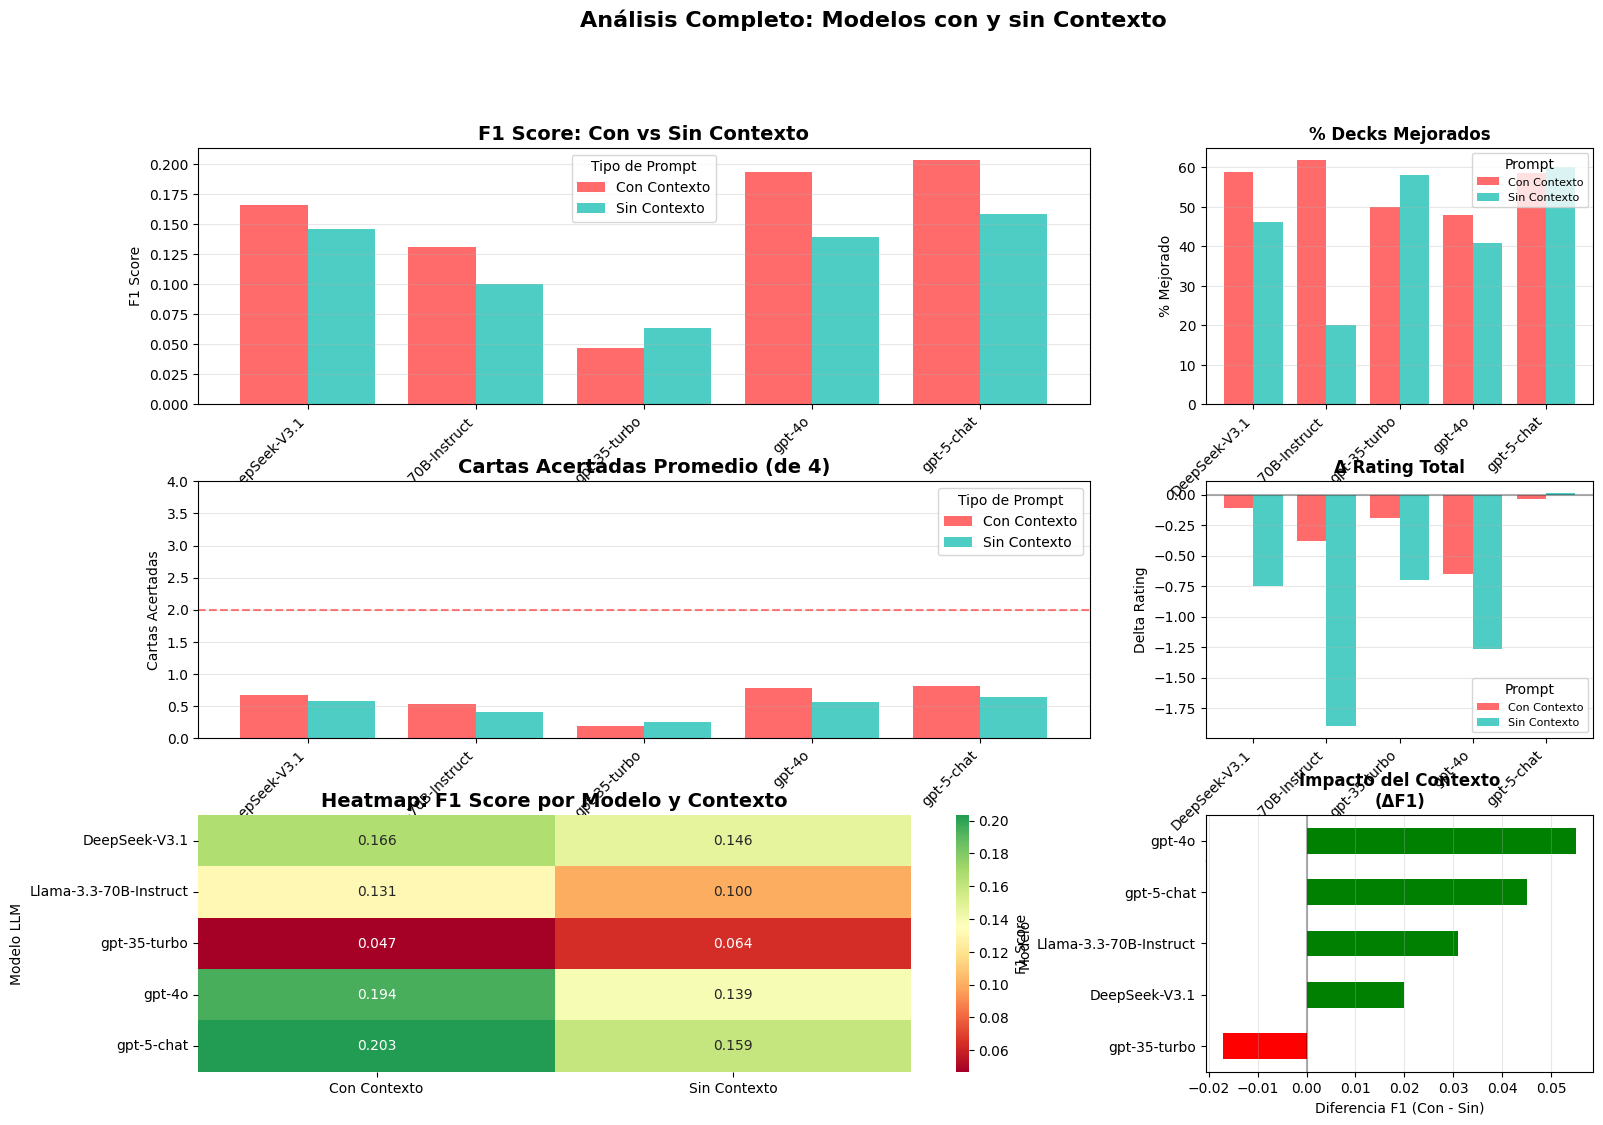

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# PASO 1: CALCULAR MÉTRICAS BÁSICAS (Precision, Recall, F1)
# ============================================================================

def calculate_metrics_per_row(row):
    """
    Calcula métricas relevantes para sistemas de recomendación.
    """
    y_true_set = set(row['deleted'])
    y_pred_set = set(row['seleccion'])
    
    true_positives = len(y_true_set & y_pred_set)
    false_positives = len(y_pred_set - y_true_set)
    false_negatives = len(y_true_set - y_pred_set)
    
    precision = true_positives / len(y_pred_set) if len(y_pred_set) > 0 else 0
    recall = true_positives / len(y_true_set) if len(y_true_set) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return pd.Series({
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positives': true_positives,
        'false_positives': false_positives,
        'false_negatives': false_negatives
    })

print("Calculando métricas básicas...")
metrics_df = df_main_valid.apply(calculate_metrics_per_row, axis=1)
df_main_valid[['precision', 'recall', 'f1_score', 'true_positives', 'false_positives', 'false_negatives']] = metrics_df

# ============================================================================
# PASO 2: EXTRAER RATINGS
# ============================================================================

def extract_ratings(row):
    """Extrae los ratings de los diccionarios a columnas individuales"""
    orig = row['original_deck_rating']
    sel = row['selected_deck_rating']
    
    return pd.Series({
        'orig_attack': orig.get('Attack', 0),
        'orig_defense': orig.get('Defense', 0),
        'orig_synergy': orig.get('Synergy', 0),
        'orig_versatility': orig.get('Versatility', 0),
        'orig_f2p': orig.get('F2P score', 0),
        'sel_attack': sel.get('Attack', 0),
        'sel_defense': sel.get('Defense', 0),
        'sel_synergy': sel.get('Synergy', 0),
        'sel_versatility': sel.get('Versatility', 0),
        'sel_f2p': sel.get('F2P score', 0),
    })

print("Extrayendo ratings...")
ratings_df = df_main_valid.apply(extract_ratings, axis=1)
df_main_valid = pd.concat([df_main_valid, ratings_df], axis=1)

df_main_valid['delta_attack'] = df_main_valid['sel_attack'] - df_main_valid['orig_attack']
df_main_valid['delta_defense'] = df_main_valid['sel_defense'] - df_main_valid['orig_defense']
df_main_valid['delta_synergy'] = df_main_valid['sel_synergy'] - df_main_valid['orig_synergy']
df_main_valid['delta_versatility'] = df_main_valid['sel_versatility'] - df_main_valid['orig_versatility']
df_main_valid['delta_f2p'] = df_main_valid['sel_f2p'] - df_main_valid['orig_f2p']
df_main_valid['delta_total'] = df_main_valid['total_selected_deck_rating'] - df_main_valid['total_original_deck_rating']

# ============================================================================
# PASO 3: MÉTRICAS ADICIONALES
# ============================================================================

df_main_valid['hit_at_least_1'] = df_main_valid['true_positives'] > 0
df_main_valid['perfect_match'] = df_main_valid['true_positives'] == 4

df_main_valid['effectiveness_score'] = (
    0.4 * df_main_valid['f1_score'] +  
    0.3 * (df_main_valid['total_selected_deck_rating'] / 25) +  
    0.3 * df_main_valid['was_improved'].astype(int)  
)

df_main_valid['context_label'] = df_main_valid['with_context'].map({
    True: 'Con Contexto',
    False: 'Sin Contexto'
})

# ============================================================================
# PASO 4: RESÚMENES POR MODELO Y CONTEXTO
# ============================================================================

print("\n" + "="*100)
print("MÉTRICAS BÁSICAS POR MODELO Y CONTEXTO")
print("="*100)
basic_summary = df_main_valid.groupby(['llm', 'context_label']).agg({
    'precision': ['mean', 'std'],
    'recall': ['mean', 'std'],
    'f1_score': ['mean', 'std'],
    'true_positives': 'mean'
}).round(4)
print(basic_summary)

print("\n" + "="*100)
print("ANÁLISIS DE MEJORAS POR MODELO Y CONTEXTO")
print("="*100)
improvement_summary = df_main_valid.groupby(['llm', 'context_label']).agg({
    'was_improved': 'mean',  
    'delta_total': 'mean',   
    'delta_synergy': 'mean',
    'delta_attack': 'mean',
    'delta_defense': 'mean',
}).round(3)
print(improvement_summary)

print("\n" + "="*100)
print("MÉTRICAS DE HITS POR MODELO Y CONTEXTO")
print("="*100)
hits_summary = df_main_valid.groupby(['llm', 'context_label']).agg({
    'hit_at_least_1': 'mean',  
    'perfect_match': 'mean',   
    'true_positives': 'mean'   
}).round(3)
print(hits_summary)

# ============================================================================
# PASO 5: COMPARACIÓN DIRECTA: CON vs SIN CONTEXTO
# ============================================================================

print("\n" + "="*100)
print("IMPACTO DEL CONTEXTO POR MODELO (Diferencia: Con Contexto - Sin Contexto)")
print("="*100)

context_impact = []
for llm in df_main_valid['llm'].unique():
    with_ctx = df_main_valid[(df_main_valid['llm'] == llm) & (df_main_valid['with_context'] == True)]
    without_ctx = df_main_valid[(df_main_valid['llm'] == llm) & (df_main_valid['with_context'] == False)]
    
    if len(with_ctx) > 0 and len(without_ctx) > 0:
        context_impact.append({
            'Modelo': llm,
            'ΔF1': with_ctx['f1_score'].mean() - without_ctx['f1_score'].mean(),
            'ΔPrecision': with_ctx['precision'].mean() - without_ctx['precision'].mean(),
            'ΔRecall': with_ctx['recall'].mean() - without_ctx['recall'].mean(),
            'ΔCartas Acertadas': with_ctx['true_positives'].mean() - without_ctx['true_positives'].mean(),
            'Δ% Mejoró': (with_ctx['was_improved'].mean() - without_ctx['was_improved'].mean()) * 100,
            'ΔRating Total': with_ctx['delta_total'].mean() - without_ctx['delta_total'].mean(),
        })

context_impact_df = pd.DataFrame(context_impact).round(3)
print(context_impact_df.to_string(index=False))

# ============================================================================
# PASO 6: RESUMEN EJECUTIVO DETALLADO
# ============================================================================

def generate_executive_summary_with_context(df):
    """Genera un resumen ejecutivo por modelo y contexto"""
    summary = []
    
    for llm in df['llm'].unique():
        for with_ctx in [True, False]:
            data = df[(df['llm'] == llm) & (df['with_context'] == with_ctx)]
            
            if len(data) > 0:
                summary.append({
                    'Modelo': llm,
                    'Contexto': 'Con Contexto' if with_ctx else 'Sin Contexto',
                    'N': len(data),
                    'F1': f"{data['f1_score'].mean():.3f}",
                    'Precision': f"{data['precision'].mean():.3f}",
                    'Recall': f"{data['recall'].mean():.3f}",
                    'Cartas/4': f"{data['true_positives'].mean():.2f}",
                    '% Mejoró': f"{data['was_improved'].mean()*100:.1f}%",
                    'Rating': f"{data['total_selected_deck_rating'].mean():.1f}",
                    'ΔRating': f"{data['delta_total'].mean():+.2f}",
                })
    
    summary_df = pd.DataFrame(summary)
    return summary_df.sort_values(['Modelo', 'Contexto'])

print("\n" + "="*100)
print("RESUMEN EJECUTIVO DETALLADO")
print("="*100)
exec_summary = generate_executive_summary_with_context(df_main_valid)
print(exec_summary.to_string(index=False))

# ============================================================================
# PASO 7: VISUALIZACIONES CON CONTEXTO
# ============================================================================

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. F1 Score por modelo y contexto
ax1 = fig.add_subplot(gs[0, :2])
f1_pivot = df_main_valid.pivot_table(
    values='f1_score', 
    index='llm', 
    columns='context_label', 
    aggfunc='mean'
)
f1_pivot.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax1.set_title('F1 Score: Con vs Sin Contexto', fontsize=14, fontweight='bold')
ax1.set_ylabel('F1 Score')
ax1.set_xlabel('Modelo LLM')
ax1.legend(title='Tipo de Prompt')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. % Mejoró el deck
ax2 = fig.add_subplot(gs[0, 2])
improved_pivot = df_main_valid.pivot_table(
    values='was_improved', 
    index='llm', 
    columns='context_label', 
    aggfunc='mean'
) * 100
improved_pivot.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax2.set_title('% Decks Mejorados', fontsize=12, fontweight='bold')
ax2.set_ylabel('% Mejorado')
ax2.set_xlabel('')
ax2.legend(title='Prompt', fontsize=8)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. Cartas acertadas
ax3 = fig.add_subplot(gs[1, :2])
tp_pivot = df_main_valid.pivot_table(
    values='true_positives', 
    index='llm', 
    columns='context_label', 
    aggfunc='mean'
)
tp_pivot.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax3.set_title('Cartas Acertadas Promedio (de 4)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Cartas Acertadas')
ax3.set_xlabel('Modelo LLM')
ax3.legend(title='Tipo de Prompt')
ax3.axhline(y=2, color='red', linestyle='--', alpha=0.5, label='50% (2/4)')
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim(0, 4)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Delta Rating Total
ax4 = fig.add_subplot(gs[1, 2])
delta_pivot = df_main_valid.pivot_table(
    values='delta_total', 
    index='llm', 
    columns='context_label', 
    aggfunc='mean'
)
delta_pivot.plot(kind='bar', ax=ax4, color=['#FF6B6B', '#4ECDC4'], width=0.8)
ax4.set_title('Δ Rating Total', fontsize=12, fontweight='bold')
ax4.set_ylabel('Delta Rating')
ax4.set_xlabel('')
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax4.legend(title='Prompt', fontsize=8)
ax4.grid(axis='y', alpha=0.3)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# 5. Heatmap de F1 Score
ax5 = fig.add_subplot(gs[2, :2])
f1_heatmap = df_main_valid.pivot_table(
    values='f1_score', 
    index='llm', 
    columns='context_label', 
    aggfunc='mean'
)
sns.heatmap(f1_heatmap, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=f1_heatmap.values.mean(), ax=ax5, cbar_kws={'label': 'F1 Score'})
ax5.set_title('Heatmap: F1 Score por Modelo y Contexto', fontsize=14, fontweight='bold')
ax5.set_xlabel('')
ax5.set_ylabel('Modelo LLM')

# 6. Impacto del contexto (delta)
ax6 = fig.add_subplot(gs[2, 2])
if len(context_impact_df) > 0:
    context_impact_df.set_index('Modelo')['ΔF1'].sort_values().plot(
        kind='barh', ax=ax6, color=['red' if x < 0 else 'green' for x in context_impact_df.set_index('Modelo')['ΔF1'].sort_values()]
    )
    ax6.set_title('Impacto del Contexto\n(ΔF1)', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Diferencia F1 (Con - Sin)')
    ax6.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    ax6.grid(axis='x', alpha=0.3)

plt.suptitle('Análisis Completo: Modelos con y sin Contexto', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

Justificacion del prompt, que tecnicas de promting se usaron, basadas en la guia de google.

tiene un factor de complejidad porque es una guia actualizada, puede haber generado una baja en rendimiento de los modelos mas basjos

problemas con timeouts de modelos, free tiers y los llamados a deckshop.

se encontro error de una regla en particular que faltaba al contexto del prompt: que solo devuelva las cartas seleccionadas.
Al no especificarse algunos modelos quedaban invalidos, en especial gpt-3.5

Se probo con distintos prompts (lite, semi_lite y full) para un samplesize de 10 usuarios en los modelos, pero no se vio una mejor tan evidente entre ellos, mas que nada fue la regla agregada enterior

Calculando Novelty...
Calculando Diversity...
Calculando Coverage (Normalizado)...
   Normalizando coverage a n_samples = 31

NOVELTY & DIVERSITY POR MODELO
                       novelty         avg_card_popularity  \
                          mean     std                mean   
llm                                                          
DeepSeek-V3.1           5.0413  0.5523              0.0322   
Llama-3.3-70B-Instruct  5.1664  0.5068              0.0293   
gpt-35-turbo            5.0875  0.6533              0.0320   
gpt-4o                  5.0502  0.4908              0.0317   
gpt-5-chat              5.2081  0.6618              0.0294   

                       intra_list_diversity          
                                       mean     std  
llm                                                  
DeepSeek-V3.1                        0.7540  0.1041  
Llama-3.3-70B-Instruct               0.6761  0.1027  
gpt-35-turbo                         0.6907  0.1350  
gpt-4o                

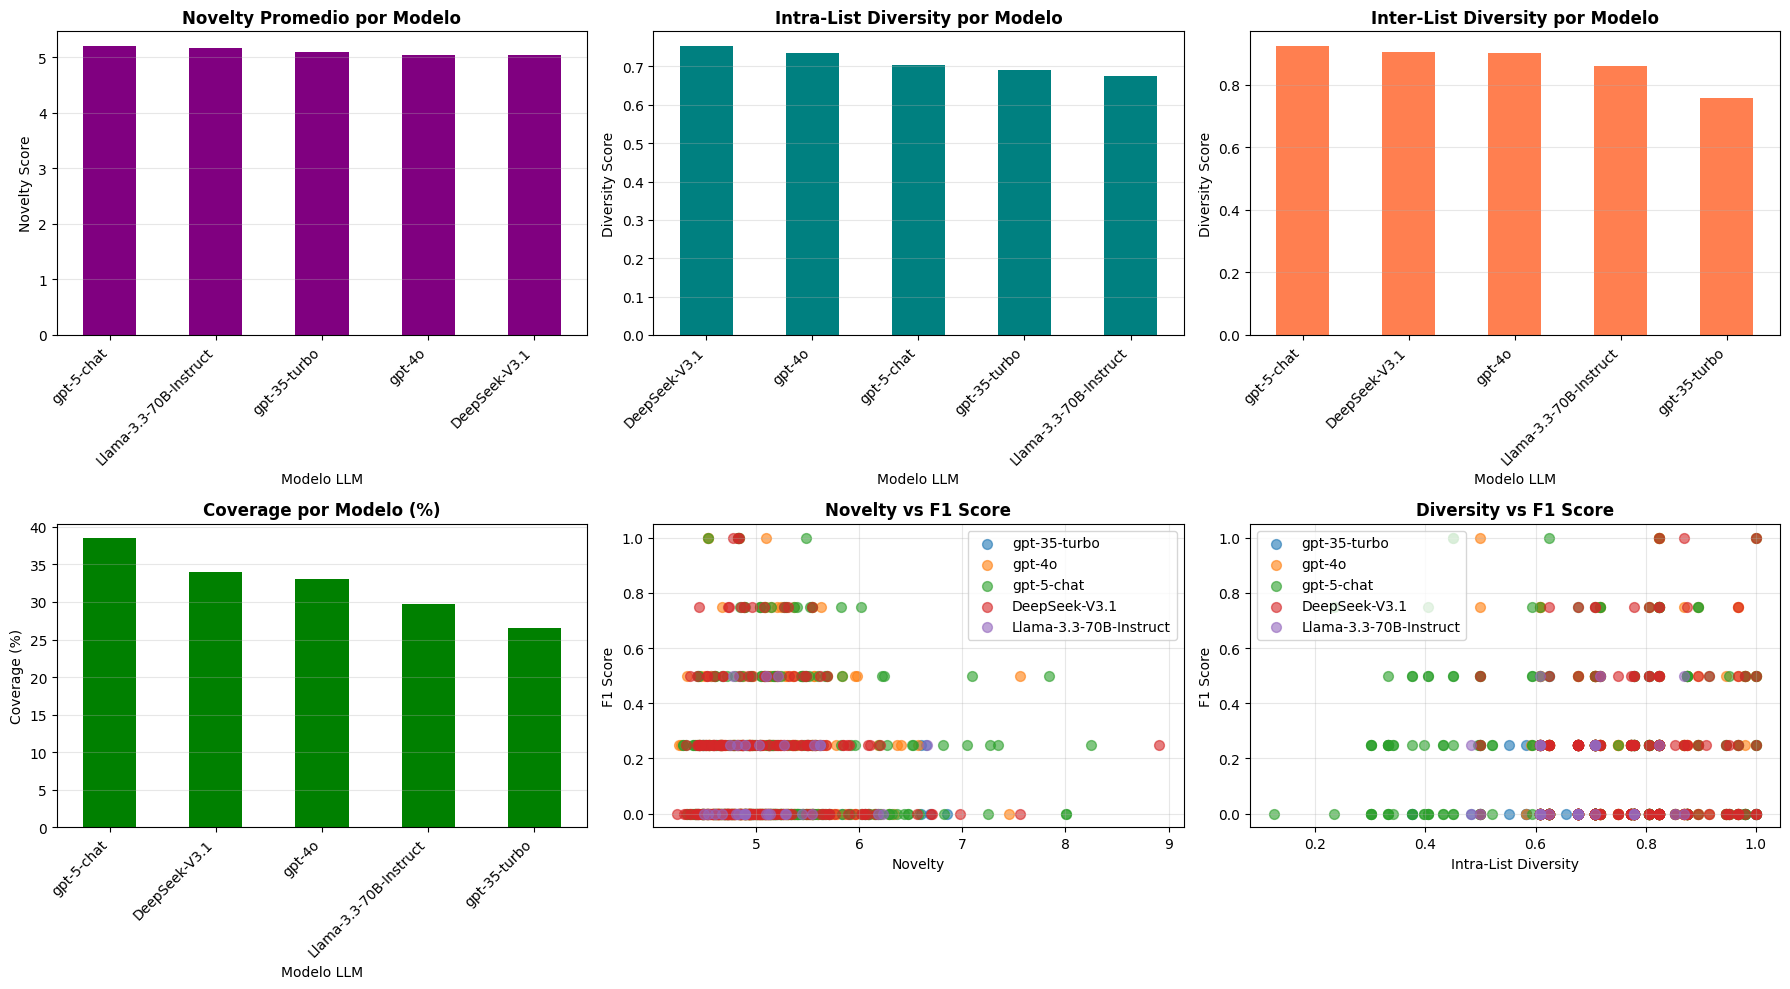


RESUMEN COMPLETO: MÉTRICAS DE RECOMENDACIÓN
                        f1_score  precision  recall  novelty  \
llm                                                            
gpt-5-chat                0.1812     0.1812  0.1812   5.2081   
gpt-4o                    0.1664     0.1664  0.1664   5.0502   
DeepSeek-V3.1             0.1561     0.1561  0.1561   5.0413   
Llama-3.3-70B-Instruct    0.1210     0.1210  0.1210   5.1664   
gpt-35-turbo              0.0593     0.0593  0.0593   5.0875   

                        intra_list_diversity  was_improved  \
llm                                                          
gpt-5-chat                            0.7034        0.5940   
gpt-4o                                0.7358        0.4437   
DeepSeek-V3.1                         0.7540        0.5249   
Llama-3.3-70B-Instruct                0.6761        0.4839   
gpt-35-turbo                          0.6907        0.5593   

                        inter_list_diversity  coverage  
llm           

In [453]:
import pandas as pd
import numpy as np
from itertools import combinations
from collections import Counter

# ============================================================================
# NOVELTY: Qué tan inusuales/raras son las cartas recomendadas
# ============================================================================

def calculate_novelty_metrics(df):
    """
    Novelty mide qué tan poco frecuentes son las recomendaciones.
    Cartas raras = mayor novelty
    """
    
    all_recommendations = []
    for _, row in df.iterrows():
        all_recommendations.extend(row['seleccion'])
    
    card_counts = Counter(all_recommendations)
    total_recommendations = len(all_recommendations)
    
    card_popularity = {card: count / total_recommendations 
                       for card, count in card_counts.items()}
    
    def calculate_novelty_per_row(row):
        """
        Novelty = -log2(popularidad promedio de las cartas recomendadas)
        Valores más altos = cartas más raras/novedosas
        """
        recommendations = row['seleccion']
        
        if len(recommendations) == 0:
            return 0
        
        popularities = [card_popularity.get(card, 0.0001) for card in recommendations]
        avg_popularity = np.mean(popularities)
        
        novelty = -np.log2(avg_popularity) if avg_popularity > 0 else 0
        
        return novelty
    
    df['novelty'] = df.apply(calculate_novelty_per_row, axis=1)
    
    df['avg_card_popularity'] = df['seleccion'].apply(
        lambda cards: np.mean([card_popularity.get(card, 0) for card in cards])
    )
    
    return df, card_popularity

# ============================================================================
# DIVERSITY: Qué tan diferentes son las recomendaciones entre sí
# ============================================================================

def calculate_diversity_metrics(df):
    """
    Diversity mide qué tan variadas son las recomendaciones.
    Dos enfoques:
    1. Intra-list diversity: diversidad dentro de cada recomendación
    2. Inter-list diversity: diversidad entre diferentes recomendaciones
    """
    
    def calculate_intra_diversity(row):
        """
        Mide cuán diferentes son las cartas dentro de una misma recomendación.
        Basado en roles, costos de elixir, etc.
        """
        if 'detalle' not in row or not row['detalle']:
            return 0
        
        detalle = row['detalle']
        
        roles = [carta.get('rol', '') for carta in detalle]
        unique_roles = len(set(roles))
        role_diversity = unique_roles / len(roles) if len(roles) > 0 else 0
        
        costos = [float(carta.get('costo_elixir', 0)) for carta in detalle]
        costo_std = np.std(costos) if len(costos) > 1 else 0
        costo_diversity = min(costo_std / 2, 1)
        
        intra_diversity = (role_diversity + costo_diversity) / 2
        
        return intra_diversity
    
    df['intra_list_diversity'] = df.apply(calculate_intra_diversity, axis=1)
    
    def jaccard_distance(set1, set2):
        """Distancia de Jaccard entre dos conjuntos"""
        intersection = len(set1 & set2)
        union = len(set1 | set2)
        return 1 - (intersection / union) if union > 0 else 0
    
    def calculate_inter_diversity_by_model(df_subset):
        """
        Calcula la diversidad promedio entre todas las recomendaciones de un modelo
        """
        recommendations = [set(row['seleccion']) for _, row in df_subset.iterrows()]
        
        if len(recommendations) < 2:
            return 0
        
        distances = []
        for rec1, rec2 in combinations(recommendations, 2):
            distances.append(jaccard_distance(rec1, rec2))
        
        return np.mean(distances) if distances else 0
    
    inter_diversity_by_model = {}
    for llm in df['llm'].unique():
        df_model = df[df['llm'] == llm]
        inter_diversity_by_model[llm] = calculate_inter_diversity_by_model(df_model)
    
    df['inter_list_diversity_model'] = df['llm'].map(inter_diversity_by_model)
    
    return df, inter_diversity_by_model

# ============================================================================
# COVERAGE: Qué porcentaje del catálogo es recomendado
# ============================================================================

def calculate_normalized_coverage(df, n_samples, iterations=100):
    """
    Coverage NORMALIZADO: porcentaje del catálogo que ha sido recomendado
    al menos una vez, usando un tamaño de muestra (n_samples) igual
    para todos los modelos (bootstrapping).
    """

    all_available = set()
    for _, row in df.iterrows():
        all_available.update(row['available_cards'])
    
    catalog_size = len(all_available)
    if catalog_size == 0:
        return 0, {}, {}, set()

    all_recommendations_biased = set()
    for _, row in df.iterrows():
        all_recommendations_biased.update(row['seleccion'])
    overall_coverage_biased = len(all_recommendations_biased) / catalog_size
    
    coverage_by_model_mean = {}
    coverage_by_model_std = {}
    
    print(f"   Normalizando coverage a n_samples = {n_samples}")
    
    for llm in df['llm'].unique():
        df_model = df[df['llm'] == llm]
        
        if len(df_model) > n_samples:
            
            model_coverages_bootstrapped = []
            
            for _ in range(iterations):
                df_sample = df_model.sample(n=n_samples, replace=False)
                
                model_recommendations_sample = set()
                for _, row in df_sample.iterrows():
                    model_recommendations_sample.update(row['seleccion'])
                
                sample_coverage = len(model_recommendations_sample) / catalog_size
                model_coverages_bootstrapped.append(sample_coverage)
            
            coverage_by_model_mean[llm] = np.mean(model_coverages_bootstrapped)
            coverage_by_model_std[llm] = np.std(model_coverages_bootstrapped)
        
        else:
            model_recommendations = set()
            for _, row in df_model.iterrows():
                model_recommendations.update(row['seleccion'])
            
            mean_cov = len(model_recommendations) / catalog_size
            coverage_by_model_mean[llm] = mean_cov
            coverage_by_model_std[llm] = 0.0

    return (overall_coverage_biased, 
            coverage_by_model_mean, 
            coverage_by_model_std, 
            all_recommendations_biased)

# ============================================================================
# APLICAR TODOS LOS CÁLCULOS
# ============================================================================

print("Calculando Novelty...")
df_main_valid, card_popularity = calculate_novelty_metrics(df_main_valid)

print("Calculando Diversity...")
df_main_valid, inter_diversity_by_model = calculate_diversity_metrics(df_main_valid)

print("Calculando Coverage (Normalizado)...")
n_samples = df_main_valid['llm'].value_counts().min()

(biased_overall_coverage, 
 coverage_by_model,
 coverage_std_dev,
 biased_unique_cards) = calculate_normalized_coverage(df_main_valid, 
                                                      n_samples=n_samples, 
                                                      iterations=100)

# ============================================================================
# RESUMEN DE NOVELTY & DIVERSITY
# ============================================================================

print("\n" + "="*100)
print("NOVELTY & DIVERSITY POR MODELO")
print("="*100)

novelty_diversity_summary = df_main_valid.groupby('llm').agg({
    'novelty': ['mean', 'std'],
    'avg_card_popularity': 'mean',
    'intra_list_diversity': ['mean', 'std'],
}).round(4)

print(novelty_diversity_summary)

print("\n" + "="*100)
print("INTER-LIST DIVERSITY & COVERAGE POR MODELO")
print("="*100)

diversity_coverage_data = []
for llm in df_main_valid['llm'].unique():
    diversity_coverage_data.append({
        'Modelo': llm,
        'Inter-List Diversity': inter_diversity_by_model[llm],
        'Coverage (%)': coverage_by_model[llm] * 100,
        'N Recomendaciones': len(df_main_valid[df_main_valid['llm'] == llm])
    })

diversity_coverage_df = pd.DataFrame(diversity_coverage_data).round(3)
print(diversity_coverage_df.to_string(index=False))

# ============================================================================
# RESUMEN CON CONTEXTO
# ============================================================================

print("\n" + "="*100)
print("NOVELTY & DIVERSITY POR MODELO Y CONTEXTO")
print("="*100)

novelty_diversity_context = df_main_valid.groupby(['llm', 'with_context']).agg({
    'novelty': 'mean',
    'intra_list_diversity': 'mean',
    'avg_card_popularity': 'mean'
}).round(4)

print(novelty_diversity_context)

# ============================================================================
# TOP CARTAS MÁS Y MENOS RECOMENDADAS
# ============================================================================

print("\n" + "="*100)
print("TOP 10 CARTAS MÁS RECOMENDADAS (menor novelty)")
print("="*100)

sorted_cards = sorted(card_popularity.items(), key=lambda x: x[1], reverse=True)
for i, (card, pop) in enumerate(sorted_cards[:10], 1):
    print(f"{i:2d}. {card:25s} - Popularidad: {pop:.4f} (Novelty: {-np.log2(pop):.2f})")

print("\n" + "="*100)
print("TOP 10 CARTAS MENOS RECOMENDADAS (mayor novelty)")
print("="*100)

for i, (card, pop) in enumerate(sorted_cards[-10:], 1):
    print(f"{i:2d}. {card:25s} - Popularidad: {pop:.4f} (Novelty: {-np.log2(pop):.2f})")

print(f"\nTotal de cartas únicas recomendadas: {len(unique_cards_recommended)}")
print(f"Coverage global: {overall_coverage * 100:.2f}%")

# ============================================================================
# VISUALIZACIONES
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Novelty por modelo
ax1 = axes[0, 0]
novelty_by_model = df_main_valid.groupby('llm')['novelty'].mean().sort_values(ascending=False)
novelty_by_model.plot(kind='bar', ax=ax1, color='purple')
ax1.set_title('Novelty Promedio por Modelo', fontsize=12, fontweight='bold')
ax1.set_ylabel('Novelty Score')
ax1.set_xlabel('Modelo LLM')
ax1.grid(axis='y', alpha=0.3)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. Intra-List Diversity por modelo
ax2 = axes[0, 1]
intra_div_by_model = df_main_valid.groupby('llm')['intra_list_diversity'].mean().sort_values(ascending=False)
intra_div_by_model.plot(kind='bar', ax=ax2, color='teal')
ax2.set_title('Intra-List Diversity por Modelo', fontsize=12, fontweight='bold')
ax2.set_ylabel('Diversity Score')
ax2.set_xlabel('Modelo LLM')
ax2.grid(axis='y', alpha=0.3)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# 3. Inter-List Diversity por modelo
ax3 = axes[0, 2]
inter_div_series = pd.Series(inter_diversity_by_model).sort_values(ascending=False)
inter_div_series.plot(kind='bar', ax=ax3, color='coral')
ax3.set_title('Inter-List Diversity por Modelo', fontsize=12, fontweight='bold')
ax3.set_ylabel('Diversity Score')
ax3.set_xlabel('Modelo LLM')
ax3.grid(axis='y', alpha=0.3)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Coverage por modelo
ax4 = axes[1, 0]
coverage_series = pd.Series(coverage_by_model).sort_values(ascending=False) * 100
coverage_series.plot(kind='bar', ax=ax4, color='green')
ax4.set_title('Coverage por Modelo (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Coverage (%)')
ax4.set_xlabel('Modelo LLM')
ax4.grid(axis='y', alpha=0.3)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

# 5. Novelty vs F1 Score
ax5 = axes[1, 1]
for llm in df_main_valid['llm'].unique():
    data = df_main_valid[df_main_valid['llm'] == llm]
    ax5.scatter(data['novelty'], data['f1_score'], label=llm, alpha=0.6, s=50)
ax5.set_xlabel('Novelty')
ax5.set_ylabel('F1 Score')
ax5.set_title('Novelty vs F1 Score', fontsize=12, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Diversity vs F1 Score
ax6 = axes[1, 2]
for llm in df_main_valid['llm'].unique():
    data = df_main_valid[df_main_valid['llm'] == llm]
    ax6.scatter(data['intra_list_diversity'], data['f1_score'], label=llm, alpha=0.6, s=50)
ax6.set_xlabel('Intra-List Diversity')
ax6.set_ylabel('F1 Score')
ax6.set_title('Diversity vs F1 Score', fontsize=12, fontweight='bold')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN COMPLETO
# ============================================================================

print("\n" + "="*100)
print("RESUMEN COMPLETO: MÉTRICAS DE RECOMENDACIÓN")
print("="*100)

complete_summary = df_main_valid.groupby('llm').agg({
    'f1_score': 'mean',
    'precision': 'mean',
    'recall': 'mean',
    'novelty': 'mean',
    'intra_list_diversity': 'mean',
    'was_improved': 'mean'
}).round(4)

# Agregar inter-diversity y coverage
complete_summary['inter_list_diversity'] = pd.Series(inter_diversity_by_model)
complete_summary['coverage'] = pd.Series(coverage_by_model)

print(complete_summary.sort_values('f1_score', ascending=False))

print("\nAnálisis de Novelty & Diversity completo!")